#### Nama : Kharisma Gilang P
#### NIM : 175410127
---

## Python untuk Data Analytics

# 10 minutes to pandas

This is a short introduction to pandas, geared mainly for new users. You can see more complex recipes in the [Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook).

Customarily, we import as follows:

In [1]:
import numpy as np
import pandas as pd

## Object creation

Creating a [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html#pandas.Series) by passing a list of values, letting pandas create a default integer index:

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) by passing a NumPy array, with a datetime index and labeled columns:

In [3]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns = list('ABCD'))
df

,A,B,C,D
2013-01-01,-1.843297,1.898145,-0.491244,-0.414744
2013-01-02,0.441792,-0.161291,1.243995,-1.338692
2013-01-03,-0.541022,1.596022,-0.629790,1.755273
2013-01-04,0.656824,-1.026907,-0.172322,-1.902972
2013-01-05,-0.522468,-0.154461,-0.300632,0.953083
2013-01-06,-0.286142,-1.527963,-0.125688,1.549603


Creating a `DataFrame` by passing a dict of objects that can be converted to series-like.

In [5]:
df2 = pd.DataFrame({'A':1.,
                    'B': pd.Timestamp('20130102'),
                    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
                    'D': np.array([2] * 4, dtype='int32'),
                   'E': pd.Categorical(["test", "train", "test", "train"]),
                   'F': 'foo'})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,2,test,foo
1,1.0,2013-01-02,1.0,2,train,foo
2,1.0,2013-01-02,1.0,2,test,foo
3,1.0,2013-01-02,1.0,2,train,foo


The columns of the resulting DataFrame have different dtypes

In [6]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## Viewing data

Here is how to view the top and bottom rows of the frame

In [7]:
df.head()

,A,B,C,D
2013-01-01,-1.843297,1.898145,-0.491244,-0.414744
2013-01-02,0.441792,-0.161291,1.243995,-1.338692
2013-01-03,-0.541022,1.596022,-0.629790,1.755273
2013-01-04,0.656824,-1.026907,-0.172322,-1.902972
2013-01-05,-0.522468,-0.154461,-0.300632,0.953083


In [8]:
df.tail(3)

,A,B,C,D
2013-01-04,0.656824,-1.026907,-0.172322,-1.902972
2013-01-05,-0.522468,-0.154461,-0.300632,0.953083
2013-01-06,-0.286142,-1.527963,-0.125688,1.549603


Display the index, columns

In [9]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [10]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

[DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) gives a NumPy representation of the underlying data. Note that this can be an expensive operation when your DataFrame has columns with different data types, which comes down to a fundamental difference between pandas and NumPy: **NumPy arrays have one dtype for the entire array, while pandas DataFrames have one dtype per column**. When you call [DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy), pandas will find the NumPy dtype that can hold all of the dtypes in the DataFrame. This may end up being `object`, which requires casting every value to a Python object.

For `df`, our [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame) of all floating-point values, [DataFrame.to_numpy()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html#pandas.DataFrame.to_numpy) is fast and doesn’t require copying data.

In [11]:
df.to_numpy()

array([[-1.84329734,  1.89814501, -0.49124444, -0.41474381],
       [ 0.44179195, -0.16129094,  1.24399466, -1.33869206],
       [-0.54102223,  1.59602163, -0.62979048,  1.75527309],
       [ 0.65682357, -1.02690673, -0.17232243, -1.90297159],
       [-0.52246849, -0.15446148, -0.30063179,  0.95308316],
       [-0.2861423 , -1.52796279, -0.12568766,  1.54960331]])

For df2, the DataFrame with multiple dtypes, DataFrame.to_numpy() is relatively expensive.

In [12]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 2, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 2, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 2, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 2, 'train', 'foo']],
      dtype=object)

> **Note**
> DataFrame.to_numpy() does not include the index or column labels in the output.

[describe()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) shows a quick statistic summary of your data:

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.349052,0.103924,-0.079280,0.100259
std,0.887792,1.380183,0.675816,1.543744
min,-1.843297,-1.527963,-0.629790,-1.902972
25%,-0.536384,-0.810503,-0.443591,-1.107705
50%,-0.404305,-0.157876,-0.236477,0.269170
75%,0.259808,1.158401,-0.137346,1.400473
max,0.656824,1.898145,1.243995,1.755273


Transposing your data

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-1.843297,0.441792,-0.541022,0.656824,-0.522468,-0.286142
B,1.898145,-0.161291,1.596022,-1.026907,-0.154461,-1.527963
C,-0.491244,1.243995,-0.629790,-0.172322,-0.300632,-0.125688
D,-0.414744,-1.338692,1.755273,-1.902972,0.953083,1.549603


Sorting by an axis

In [17]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.414744,-0.491244,1.898145,-1.843297
2013-01-02,-1.338692,1.243995,-0.161291,0.441792
2013-01-03,1.755273,-0.629790,1.596022,-0.541022
2013-01-04,-1.902972,-0.172322,-1.026907,0.656824
2013-01-05,0.953083,-0.300632,-0.154461,-0.522468
2013-01-06,1.549603,-0.125688,-1.527963,-0.286142


In [16]:
df.sort_index(axis=0, ascending=False)

,A,B,C,D
2013-01-06,-0.286142,-1.527963,-0.125688,1.549603
2013-01-05,-0.522468,-0.154461,-0.300632,0.953083
2013-01-04,0.656824,-1.026907,-0.172322,-1.902972
2013-01-03,-0.541022,1.596022,-0.629790,1.755273
2013-01-02,0.441792,-0.161291,1.243995,-1.338692
2013-01-01,-1.843297,1.898145,-0.491244,-0.414744


Sorting by values

In [18]:
df.sort_values(by='A')

,A,B,C,D
2013-01-01,-1.843297,1.898145,-0.491244,-0.414744
2013-01-03,-0.541022,1.596022,-0.629790,1.755273
2013-01-05,-0.522468,-0.154461,-0.300632,0.953083
2013-01-06,-0.286142,-1.527963,-0.125688,1.549603
2013-01-02,0.441792,-0.161291,1.243995,-1.338692
2013-01-04,0.656824,-1.026907,-0.172322,-1.902972


## Selection

> **Note**
> While standard Python / Numpy expressions for selecting and setting are intuitive and come in handy for interactive work, for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .iloc.

See the indexing documentation [Indexing and Selecting Data](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#indexing) and [MultiIndex / Advanced Indexing](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced).



## Getting

Selecting a single column, which yields a Series, equivalent to df.A

In [19]:
df['A']

2013-01-01   -1.843297
2013-01-02    0.441792
2013-01-03   -0.541022
2013-01-04    0.656824
2013-01-05   -0.522468
2013-01-06   -0.286142
Freq: D, Name: A, dtype: float64

Selecting view [], which slices the rows

In [20]:
df[0:3]

,A,B,C,D
2013-01-01,-1.843297,1.898145,-0.491244,-0.414744
2013-01-02,0.441792,-0.161291,1.243995,-1.338692
2013-01-03,-0.541022,1.596022,-0.629790,1.755273


In [21]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.441792,-0.161291,1.243995,-1.338692
2013-01-03,-0.541022,1.596022,-0.629790,1.755273
2013-01-04,0.656824,-1.026907,-0.172322,-1.902972


## Selection By Label

In [22]:
df.loc[dates[0]]

A   -1.843297
B    1.898145
C   -0.491244
D   -0.414744
Name: 2013-01-01 00:00:00, dtype: float64

Selection on a multi-axis by label

In [23]:
df.loc[:,['A', 'B']]

,A,B
2013-01-01,-1.843297,1.898145
2013-01-02,0.441792,-0.161291
2013-01-03,-0.541022,1.596022
2013-01-04,0.656824,-1.026907
2013-01-05,-0.522468,-0.154461
2013-01-06,-0.286142,-1.527963


Showing label slicing, both endpoints are included

In [24]:
df.loc['20130102':'20130104', ['A', 'B']]

,A,B
2013-01-02,0.441792,-0.161291
2013-01-03,-0.541022,1.596022
2013-01-04,0.656824,-1.026907


Reduction in the dimensions of the returned object

In [25]:
df.loc['20130102', ['A', 'B']]

A    0.441792
B   -0.161291
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [26]:
df.loc[dates[0], 'A']

-1.8432973389417062

For getting fast access to a scalar (equivalent to the prior method)

In [27]:
df.at[dates[0], 'A']

-1.8432973389417062

Selection by position

In [28]:
df.iloc[3]

A    0.656824
B   -1.026907
C   -0.172322
D   -1.902972
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, actiong similar to numpy/python

In [29]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.656824,-1.026907
2013-01-05,-0.522468,-0.154461


By list of integer position locations, similar to the numpy/python style

In [30]:
df.iloc[[1, 2, 3], [0, 2]]

,A,C
2013-01-02,0.441792,1.243995
2013-01-03,-0.541022,-0.629790
2013-01-04,0.656824,-0.172322


for slicing rows explicity

In [31]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,0.441792,-0.161291,1.243995,-1.338692
2013-01-03,-0.541022,1.596022,-0.629790,1.755273


for slicing columnsexplicity

In [32]:
df.iloc[:, 1:3]

,B,C
2013-01-01,1.898145,-0.491244
2013-01-02,-0.161291,1.243995
2013-01-03,1.596022,-0.629790
2013-01-04,-1.026907,-0.172322
2013-01-05,-0.154461,-0.300632
2013-01-06,-1.527963,-0.125688


FOR GETTING A VALUE EXPLICITY

In [33]:
df.iloc[1, 1]

-0.16129093695363747

FOR GETTING FAST ACCESS TO A SCALAR (Equivalent to the prior method)

In [34]:
df.iat[1, 1]

-0.16129093695363747

## Boolean indexing

In [35]:
# using a single column's values to select data
df[df.C > 0]

,A,B,C,D
2013-01-02,0.441792,-0.161291,1.243995,-1.338692


In [36]:
# Selecting values from a DataFrame where a boolean confition is met
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.898145,NaN,NaN
2013-01-02,0.441792,NaN,1.243995,NaN
2013-01-03,NaN,1.596022,NaN,1.755273
2013-01-04,0.656824,NaN,NaN,NaN
2013-01-05,NaN,NaN,NaN,0.953083
2013-01-06,NaN,NaN,NaN,1.549603


In [37]:
# using the isin() method for filtering
df2 = df.copy()
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-1.843297,1.898145,-0.491244,-0.414744,one
2013-01-02,0.441792,-0.161291,1.243995,-1.338692,one
2013-01-03,-0.541022,1.596022,-0.629790,1.755273,two
2013-01-04,0.656824,-1.026907,-0.172322,-1.902972,three
2013-01-05,-0.522468,-0.154461,-0.300632,0.953083,four
2013-01-06,-0.286142,-1.527963,-0.125688,1.549603,three


In [38]:
df2[df2['E'].isin(['one', 'four'])]

,A,B,C,D,E
2013-01-01,-1.843297,1.898145,-0.491244,-0.414744,one
2013-01-02,0.441792,-0.161291,1.243995,-1.338692,one
2013-01-05,-0.522468,-0.154461,-0.300632,0.953083,four


## Setting

In [39]:
# Setting a new column automatically aligns the data by the indexes
sl = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range('20130101',periods=6))
sl

2013-01-01    1
2013-01-02    2
2013-01-03    3
2013-01-04    4
2013-01-05    5
2013-01-06    6
Freq: D, dtype: int64

In [40]:
df['F'] = sl

# Setting values by label
df.at[dates[0], 'A'] = 0
# setting values by position
df.iat[0, 1] = 0
# setting assigning with a NumPy array
df.loc[:, 'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.491244,5,1
2013-01-02,0.441792,-0.161291,1.243995,5,2
2013-01-03,-0.541022,1.596022,-0.629790,5,3
2013-01-04,0.656824,-1.026907,-0.172322,5,4
2013-01-05,-0.522468,-0.154461,-0.300632,5,5
2013-01-06,-0.286142,-1.527963,-0.125688,5,6


In [41]:
# A where operation with setting
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.491244,-5,-1
2013-01-02,-0.441792,-0.161291,-1.243995,-5,-2
2013-01-03,-0.541022,-1.596022,-0.629790,-5,-3
2013-01-04,-0.656824,-1.026907,-0.172322,-5,-4
2013-01-05,-0.522468,-0.154461,-0.300632,-5,-5
2013-01-06,-0.286142,-1.527963,-0.125688,-5,-6


## Missing data

pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. See the [Missing Data section](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html#missing-data).

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [42]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1.loc[dates[0]:dates[1], 'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.491244,5,1,1.0
2013-01-02,0.441792,-0.161291,1.243995,5,2,1.0
2013-01-03,-0.541022,1.596022,-0.629790,5,3,NaN
2013-01-04,0.656824,-1.026907,-0.172322,5,4,NaN


In [43]:
# To drop any rows that have missing data.
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.491244,5,1,1.0
2013-01-02,0.441792,-0.161291,1.243995,5,2,1.0


In [44]:
# filling missing data
df1.fillna(value=5)


,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.491244,5,1,1.0
2013-01-02,0.441792,-0.161291,1.243995,5,2,1.0
2013-01-03,-0.541022,1.596022,-0.629790,5,3,5.0
2013-01-04,0.656824,-1.026907,-0.172322,5,4,5.0


In [45]:
# To get boolean mask where values are nan
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,False,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

## Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [46]:
df.mean()

A   -0.041836
B   -0.212433
C   -0.079280
D    5.000000
F    3.500000
dtype: float64

In [47]:
# same operation on the other axis
df.mean(1)

2013-01-01    1.101751
2013-01-02    1.704899
2013-01-03    1.685042
2013-01-04    1.691519
2013-01-05    1.804488
2013-01-06    1.812041
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically broadcasts along the specified dimension.

In [48]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(0)
s

2013-01-01    1.0
2013-01-02    3.0
2013-01-03    5.0
2013-01-04    NaN
2013-01-05    6.0
2013-01-06    8.0
Freq: D, dtype: float64

In [49]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,-1.000000,-1.000000,-1.491244,4.0,0.0
2013-01-02,-2.558208,-3.161291,-1.756005,2.0,-1.0
2013-01-03,-5.541022,-3.403978,-5.629790,0.0,-2.0
2013-01-04,NaN,NaN,NaN,NaN,NaN
2013-01-05,-6.522468,-6.154461,-6.300632,-1.0,-1.0
2013-01-06,-8.286142,-9.527963,-8.125688,-3.0,-2.0


## Apply

Applying functions to the data:

In [50]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.491244,5,1
2013-01-02,0.441792,-0.161291,0.752750,10,3
2013-01-03,-0.099230,1.434731,0.122960,15,6
2013-01-04,0.557593,0.407824,-0.049363,20,10
2013-01-05,0.035125,0.253362,-0.349994,25,15
2013-01-06,-0.251017,-1.274600,-0.475682,30,21


In [51]:
df.apply(lambda x: x.max() - x.min())

A    1.197846
B    3.123984
C    1.873785
D    0.000000
F    5.000000
dtype: float64

## Histogramming

In [52]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    1
1    4
2    6
3    0
4    1
5    4
6    5
7    2
8    6
9    3
dtype: int32

In [53]:
s.value_counts()

6    2
4    2
1    2
5    1
3    1
2    1
0    1
dtype: int64

## String methods

Series is equipped with a set of string processing methods in the str atribute that make it easy to operate on each element of the array, as in the code snipper below. Note that pattern-matching in *str* generally uses [regular expressions](https://docs.python.org/3/library/re.html) by default (and in some cases always uses them). See more at [Vectorized String Methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-string-methods).

In [54]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## Merge

## Concat

pandas provides various facilities for easily combining together Series and DataFrame objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merge-type operations.

Concatenating pandas objects together with [concat()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html#pandas.concat):

In [55]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-0.285486,0.894861,-1.028676,-0.109151
1,-0.082728,0.500150,0.402004,0.614049
2,0.627090,-1.435121,0.062700,0.438906
3,-0.917520,1.316807,-0.686715,0.407552
4,0.827932,-0.399103,2.384072,-0.730638
5,-1.937432,-1.262096,0.464050,-0.655459
6,-2.035013,-1.797992,-0.383978,-1.061475
7,0.198225,-0.114149,-2.747267,-1.158056
8,0.069497,-0.635567,2.550866,-0.963336
9,0.645673,-1.486809,0.795509,-0.289888


In [56]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0 -0.285486  0.894861 -1.028676 -0.109151
 1 -0.082728  0.500150  0.402004  0.614049
 2  0.627090 -1.435121  0.062700  0.438906,
           0         1         2         3
 3 -0.917520  1.316807 -0.686715  0.407552
 4  0.827932 -0.399103  2.384072 -0.730638
 5 -1.937432 -1.262096  0.464050 -0.655459
 6 -2.035013 -1.797992 -0.383978 -1.061475,
           0         1         2         3
 7  0.198225 -0.114149 -2.747267 -1.158056
 8  0.069497 -0.635567  2.550866 -0.963336
 9  0.645673 -1.486809  0.795509 -0.289888]

In [57]:
pd.concat(pieces)

,0,1,2,3
0,-0.285486,0.894861,-1.028676,-0.109151
1,-0.082728,0.500150,0.402004,0.614049
2,0.627090,-1.435121,0.062700,0.438906
3,-0.917520,1.316807,-0.686715,0.407552
4,0.827932,-0.399103,2.384072,-0.730638
5,-1.937432,-1.262096,0.464050,-0.655459
6,-2.035013,-1.797992,-0.383978,-1.061475
7,0.198225,-0.114149,-2.747267,-1.158056
8,0.069497,-0.635567,2.550866,-0.963336
9,0.645673,-1.486809,0.795509,-0.289888


## Join

SQL style merges. See the [Database style joining](https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html#merging-join) section.

In [58]:
left = pd.DataFrame({'key':['foo', 'foo'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo','foo'], 'rval': [4, 5]})
left

,key,lval
0,foo,1
1,foo,2


In [59]:
right

,key,rval
0,foo,4
1,foo,5


In [60]:
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [61]:
# Another example that can be given is
left = pd.DataFrame({'key':['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key':['foo', 'bar'],'rval':[4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## Grouping

By “group by” we are referring to a process involving one or more of the following steps:

* **Splitting** the data into groups based on some criteria.
* **Applying** a function to each group independently.
* **Combining** the results into a data structure.

In [62]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                            'foo', 'bar', 'foo', 'foo'],
                'B': ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                'C': np.random.randn(8),
                'D': np.random.randn(8)})
df

,A,B,C,D
0,foo,one,-0.254496,-0.421735
1,bar,one,0.858290,0.454001
2,foo,two,0.484955,0.395046
3,bar,three,-0.723687,-0.608750
4,foo,two,0.258151,-1.454818
5,bar,two,-1.002065,-1.378673
6,foo,one,-0.129936,-0.483982
7,foo,three,-0.636547,-0.758922


In [63]:
# Grouping and then applying the sum() function to the resulting groups
df.groupby('B').sum()

,C,D
B,,
one,0.473858,-0.451716
three,-1.360234,-1.367671
two,-0.258959,-2.438445


In [64]:
# Grouping by multiple columns forms a hierarchical index, and again we can apply the sum function
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one    0.858290  0.454001
    three -0.723687 -0.608750
    two   -1.002065 -1.378673
foo one   -0.384432 -0.905717
    three -0.636547 -0.758922
    two    0.743106 -1.059772

## Reshaping

## Stack

In [65]:
In [95]: tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                         'foo', 'foo', 'qux', 'qux'],
                        ['one', 'two', 'one', 'two',
                         'one', 'two', 'one', 'two']]))
   
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

df2 = df[:4]

df2

A         B
first second                    
bar   one     0.206654 -0.119385
      two    -0.242472 -1.262853
baz   one    -0.075387 -0.357871
      two     1.440581 -0.975887

In [66]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    0.206654
               B   -0.119385
       two     A   -0.242472
               B   -1.262853
baz    one     A   -0.075387
               B   -0.357871
       two     A    1.440581
               B   -0.975887
dtype: float64

With a “stacked” DataFrame or Series (having a MultiIndex as the index), the inverse operation of [stack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [unstack()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [67]:
stacked.unstack()

A         B
first second                    
bar   one     0.206654 -0.119385
      two    -0.242472 -1.262853
baz   one    -0.075387 -0.357871
      two     1.440581 -0.975887

In [68]:
stacked.unstack(1)

second        one       two
first                      
bar   A  0.206654 -0.242472
      B -0.119385 -1.262853
baz   A -0.075387  1.440581
      B -0.357871 -0.975887

In [69]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  0.206654 -0.075387
       B -0.119385 -0.357871
two    A -0.242472  1.440581
       B -1.262853 -0.975887

## Pivot tables

In [70]:
df = pd.DataFrame({
    'A': ['one', 'one', 'two', 'three'] * 3,
    'B': ['A', 'B', 'C'] * 4,
    'C': ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
    'D': np.random.randn(12),
    'E': np.random.randn(12)
})
df

,A,B,C,D,E
0,one,A,foo,-1.354660,0.502825
1,one,B,foo,-0.268300,0.257254
2,two,C,foo,2.458362,0.583060
3,three,A,bar,-0.268182,-0.366368
4,one,B,bar,-2.343309,-1.465395
5,one,C,bar,1.167382,-0.607153
6,two,A,foo,-2.196754,-0.446269
7,three,B,foo,0.217091,0.216040
8,one,C,foo,1.240540,1.091832
9,one,A,bar,0.493838,-0.452003


In [71]:
# We can produce pivot tables from this data very easily
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  0.493838 -1.354660
      B -2.343309 -0.268300
      C  1.167382  1.240540
three A -0.268182       NaN
      B       NaN  0.217091
      C -0.477992       NaN
two   A       NaN -2.196754
      B -0.205064       NaN
      C       NaN  2.458362

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series section](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries).

In [72]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index = rng)
ts.resample('5Min').sum()

2012-01-01    26878
Freq: 5T, dtype: int32

In [74]:
# Time zone representation
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)

In [75]:
ts

2012-03-06    2.023909
2012-03-07    1.277490
2012-03-08    2.573333
2012-03-09    1.734688
2012-03-10   -0.677732
Freq: D, dtype: float64

In [76]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    2.023909
2012-03-07 00:00:00+00:00    1.277490
2012-03-08 00:00:00+00:00    2.573333
2012-03-09 00:00:00+00:00    1.734688
2012-03-10 00:00:00+00:00   -0.677732
Freq: D, dtype: float64

In [77]:
# Converting to another time zone
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    2.023909
2012-03-06 19:00:00-05:00    1.277490
2012-03-07 19:00:00-05:00    2.573333
2012-03-08 19:00:00-05:00    1.734688
2012-03-09 19:00:00-05:00   -0.677732
Freq: D, dtype: float64

## Categoricals

pandas can include categorical data in a DataFrame. For full docs, see the [categorical introduction](https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/pandas-docs/stable/reference/arrays.html#api-arrays-categorical).

In [78]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
              "raw_grade": ['a', 'b', 'b', 'a', 'a', 'e']})

In [79]:
# Convert the raw grades to a categorical data type.
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

Rename the categories to more meaningful names (assigning to Series.cat.categories is inplace!).

In [80]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

Reorder the categories and simultaneously add the missing categories (methods under Series .cat return a new Series by default).

In [81]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium",
                                    "good", "very good"])          

In [82]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

In [83]:
# Sorting is per order in the categories, not lexical order.
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [84]:
# Grouping by a categorical column also shows empty categories.
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

We use the standard convention for referencing the matplotlib API:

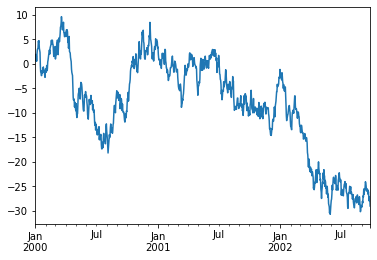

In [85]:
ts = pd.Series(np.random.randn(1000),
                        index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

<Figure size 432x288 with 0 Axes>

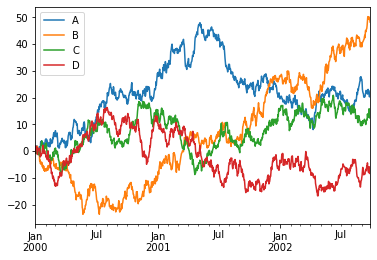

In [86]:
import matplotlib.pyplot as plt
# On a DataFrame, the plots() method is a convenience to plot all of the columns with labels
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                 columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure()
df.plot()
plt.legend(loc='best')

## Getting data in/out

## CSV

Menulis data ke file csv.

In [87]:
df.to_csv('data_perusahaan.csv')

Membaca data dari file csv.

In [95]:
data = pd.read_csv("data_perusahaan.csv")
data.head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.732916,0.669322,-0.766267,-0.440467
1,2000-01-02,0.300773,1.683291,-0.737503,1.945925
2,2000-01-03,-0.537683,1.502479,0.192908,1.731139
3,2000-01-04,1.828704,0.902431,-0.221911,1.220980
4,2000-01-05,1.825323,0.635672,-0.364352,0.788175
